In [5]:
! ls -lrth data/data2

total 1049840
-rw-r--r--@ 1 hims  staff   145M Oct 29 03:00 credit_card_transaction_test.csv
-rw-r--r--@ 1 hims  staff   338M Oct 29 03:00 credit_card_transaction_train.csv


In [1]:
import pandas as pd
import numpy as np

In [33]:
df = pd.read_csv('data/data2/credit_card_transaction_test.csv')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,555719.0,2.778590e+05,1.604224e+05,0.000000e+00,1.389295e+05,2.778590e+05,4.167885e+05,5.557180e+05
cc_num,555719.0,4.178387e+17,1.309837e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.635331e+15,4.992346e+18
amt,555719.0,6.939281e+01,1.567459e+02,1.000000e+00,9.630000e+00,4.729000e+01,8.301000e+01,2.276811e+04
zip,555719.0,4.884263e+04,2.685528e+04,1.257000e+03,2.629200e+04,4.817400e+04,7.201100e+04,9.992100e+04
lat,555719.0,3.854325e+01,5.061336e+00,2.002710e+01,3.466890e+01,3.937160e+01,4.189480e+01,6.568990e+01
long,555719.0,-9.023133e+01,1.372178e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.017520e+01,-6.795030e+01
city_pop,555719.0,8.822189e+04,3.003909e+05,2.300000e+01,7.410000e+02,2.408000e+03,1.968500e+04,2.906700e+06
unix_time,555719.0,1.380679e+09,5.201104e+06,1.371817e+09,1.376029e+09,1.380762e+09,1.385867e+09,1.388534e+09
merch_lat,555719.0,3.854280e+01,5.095829e+00,1.902742e+01,3.475530e+01,3.937659e+01,4.195416e+01,6.667930e+01
merch_long,555719.0,-9.023138e+01,1.373307e+01,-1.666716e+02,-9.690513e+01,-8.744520e+01,-8.026464e+01,-6.695203e+01


# compute distace between two points

In [34]:
# compute distance between coordinates in miles

import math

# compute age from the dob, write function to compute that
def compute_age(dob):
    return 2021 - int(dob.split('-')[0])


# Haversine function
def haversine(lat1, lon1, lat2, lon2):
    R = 3963.0  # Earth radius in miles
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.asin(math.sqrt(a))
    return R * c

# Add a new column 'distance' by applying the haversine function row-wise
df['distance'] = df.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

# Display the DataFrame with the new 'distance' column
df.head()



,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,distance
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,29072.0,15.278147
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,NaN,65.267327
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,10307.0,36.750015
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,32759.0,17.229544
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,49653.0,64.900334


In [35]:
df[df['is_fraud'] == 1].head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,distance
1685,1685,2020-06-21 22:06:39,3560725013359375,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,23,Cytogeneticist,1969-09-15,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.604290,1,79360.0,50.166778
1767,1767,2020-06-21 22:32:22,6564459919350820,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,1306,Public relations officer,1958-09-10,ab4b379d2c0c9c667d46508d4e126d72,1371853942,42.461127,-91.147148,1,52040.0,41.115374
1781,1781,2020-06-21 22:37:27,6564459919350820,fraud_Nienow PLC,entertainment,620.33,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,1306,Public relations officer,1958-09-10,47a9987ae81d99f7832a54b29a77bf4b,1371854247,42.771834,-90.158365,1,53565.0,17.938008
1784,1784,2020-06-21 22:38:55,4005676619255478,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,William,Perry,M,458 Phillips Island Apt. 768,...,71335,Herbalist,1994-05-31,fe956c7e4a253c437c18918bf96f7b62,1371854335,31.204974,-90.261595,1,39667.0,64.125226
1857,1857,2020-06-21 23:02:16,3560725013359375,fraud_Hermann and Sons,shopping_pos,842.65,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,23,Cytogeneticist,1969-09-15,f6838c01f5d2262006e6b71d33ba7c6d,1371855736,31.315782,-102.736390,1,NaN,37.636338


In [36]:
df[df['cc_num'] == 3560725013359375].head(100)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,distance
1685,1685,2020-06-21 22:06:39,3560725013359375,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,23,Cytogeneticist,1969-09-15,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.604290,1,79360.0,50.166778
1857,1857,2020-06-21 23:02:16,3560725013359375,fraud_Hermann and Sons,shopping_pos,842.65,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,23,Cytogeneticist,1969-09-15,f6838c01f5d2262006e6b71d33ba7c6d,1371855736,31.315782,-102.736390,1,NaN,37.636338
3590,3590,2020-06-22 11:54:17,3560725013359375,"fraud_Tillman, Dickinson and Labadie",gas_transport,58.87,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,23,Cytogeneticist,1969-09-15,12b88afa696a1c5eec27caa128d99787,1371902057,32.380452,-102.899603,0,NaN,37.180259
4111,4111,2020-06-22 14:27:21,3560725013359375,"fraud_Bahringer, Osinski and Block",food_dining,83.02,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,23,Cytogeneticist,1969-09-15,b7b0be27afbf837ac8d0d84047bdc8f9,1371911241,31.523789,-102.108125,0,NaN,43.921570
4339,4339,2020-06-22 15:29:41,3560725013359375,fraud_Fahey Inc,kids_pets,11.34,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,23,Cytogeneticist,1969-09-15,3dd17ef2ff60aed870ecc7ba15710837,1371914981,32.738479,-101.904243,0,79331.0,78.024011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60022,60022,2020-07-12 10:55:53,3560725013359375,fraud_Rutherford-Mertz,grocery_pos,120.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,23,Cytogeneticist,1969-09-15,37ee696a11771a11cc8a3326ac62ba11,1373626553,31.362684,-101.765161,0,NaN,66.998709
60070,60070,2020-07-12 11:24:32,3560725013359375,"fraud_Kovacek, Dibbert and Ondricka",grocery_pos,140.45,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,23,Cytogeneticist,1969-09-15,022f3a03dc08f0da2135ae308d3a1c63,1373628272,32.235059,-102.944294,0,NaN,28.547665
60154,60154,2020-07-12 12:03:57,3560725013359375,fraud_Grimes LLC,entertainment,11.25,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,23,Cytogeneticist,1969-09-15,60aa3f575e8fb1ea715795d747924bbc,1373630637,32.318832,-102.830424,0,NaN,32.169899
61391,61391,2020-07-12 19:21:15,3560725013359375,fraud_Hills-Boyer,personal_care,11.32,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,23,Cytogeneticist,1969-09-15,f4f230f780d49983e21b2c78bb29219b,1373656875,30.954681,-102.863302,0,79735.0,63.024495


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

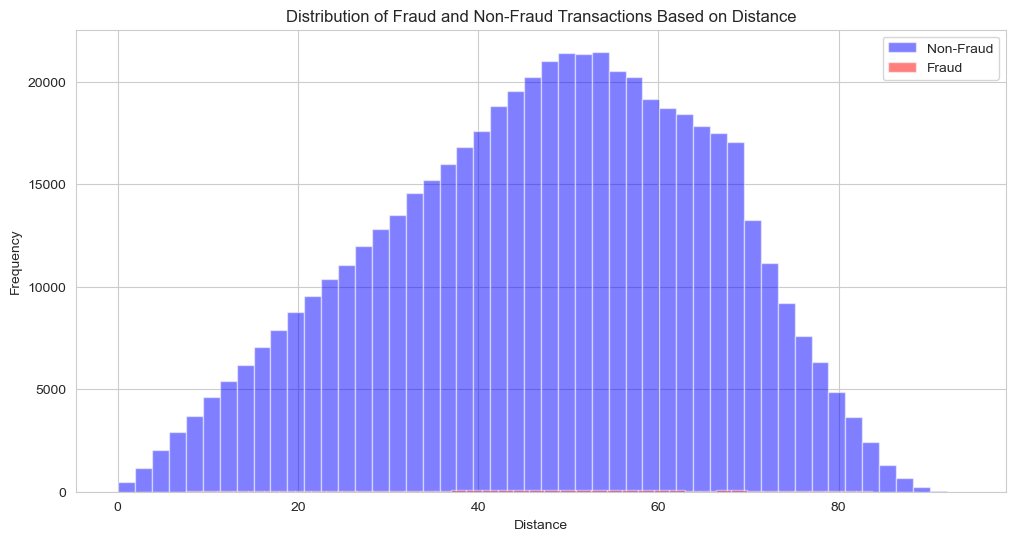

In [66]:
import matplotlib.pyplot as plt

def plot_distance_distribution(df):
    # Separate fraud and non-fraud transactions
    fraud_transactions = df[df['is_fraud'] == 1]
    non_fraud_transactions = df[df['is_fraud'] == 0]
    
    # Plot histograms
    plt.figure(figsize=(12, 6))
    
    # Non-fraud transactions
    plt.hist(non_fraud_transactions['distance'], bins=50, alpha=0.5, label='Non-Fraud', color='blue')
    
    # Fraud transactions
    plt.hist(fraud_transactions['distance'], bins=50, alpha=0.5, label='Fraud', color='red')
    
    # Add labels and title
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.title('Distribution of Fraud and Non-Fraud Transactions Based on Distance')
    plt.legend()
    
    plt.show()

# Call the function to plot
plot_distance_distribution(df)


In [79]:
import plotly.graph_objects as go

# Assume df has the columns 'lat', 'long', 'merch_lat', 'merch_long', and 'is_fraud'

def plot_map(df):
    # Calculate the center of the map
    center_lat = df['lat'].mean()
    center_long = df['long'].mean() 

    # Calculate the latitude and longitude ranges to set the zoom level
    lat_range = max(df['lat'].max(), df['merch_lat'].max()) - min(df['lat'].min(), df['merch_lat'].min())
    long_range = max(df['long'].max(), df['merch_long'].max()) - min(df['long'].min(), df['merch_long'].min())

    # Adjust zoom based on the ranges (lower zoom if range is large)
    zoom = 4 if max(lat_range, long_range) > 10 else 8

    # Create a list of lines, each line connecting (lat, long) to (merch_lat, merch_long)
    fig = go.Figure()

    for _, row in df.iterrows():
        color = 'red' if row['is_fraud'] == 1 else 'blue'  # Fraud in red, good transactions in blue
        fig.add_trace(go.Scattermapbox(
            mode="lines",
            lon=[row['long'], row['merch_long']],
            lat=[row['lat'], row['merch_lat']],
            line={'color': color},
            marker={'size': 1}
        ))

    # Update the map layout with the calculated center and zoom
    fig.update_layout(
        mapbox={
            'style': "carto-positron",
            'center': {'lon': center_long, 'lat': center_lat},  # Center the map
            'zoom': zoom  # Adjust the zoom level based on data range
        },
        height=800,  # Make the y-axis (plot height) bigger
        showlegend=False
    )

    fig.show()


# Combine the sampled data
sampled_fraud = df[df['is_fraud'] == 1].sample(100)
sampled_non_fraud = df[df['is_fraud'] == 0].sample(900)

# Concatenate and then take a random sample of 1000 rows
sampled_df = pd.concat([sampled_fraud, sampled_non_fraud])

plot_map(sampled_df) # [df['cc_num'] == 3560725013359375]


In [ ]:
# show the distribution of the fraud and non fraud transactions based on the distance
import plotly.express as px
